In [1]:
# !python /Users/kit/Documents/Phys_Working/LLM_SR/check_path.py

# import sys
# print("\nAdding project directory to Python path...")
# sys.path.insert(0, '/Users/kit/Documents/Phys_Working/LLM_SR')
# print(f"  - Added: {sys.path[0]}")

import llmlex
import openai

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:

api_key = os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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"
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=api_key,
)

# Raw Data

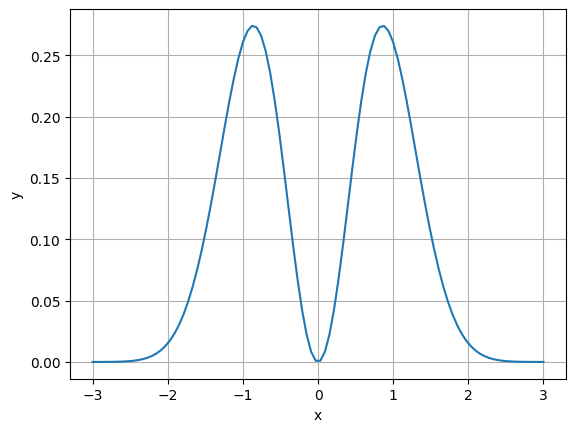

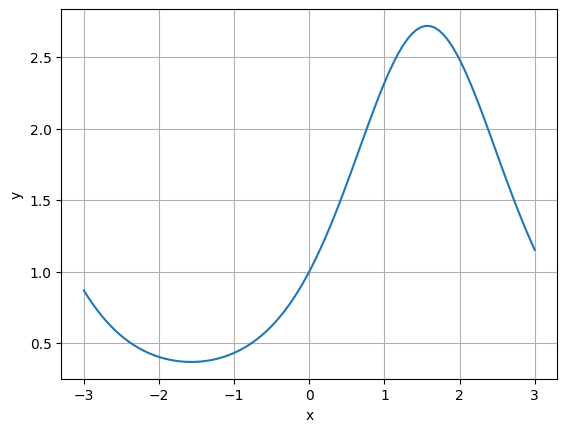

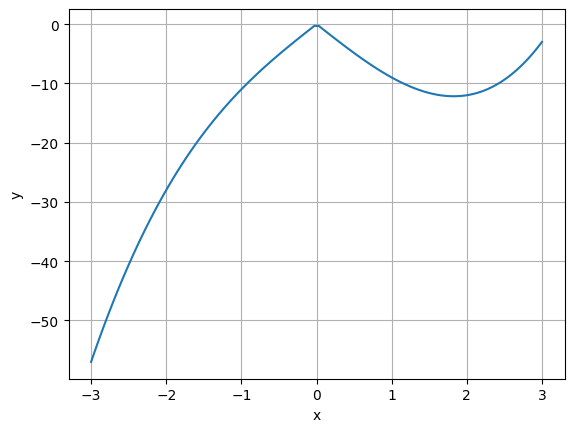

In [3]:
x = np.linspace(-3, 3, 100)
y = np.exp(-x**2)*np.sin(x)**2
y2 = np.exp(np.sin(x))
y3 = x**3. - 10*np.abs(x)
#y = np.pi*np.ones(100)

plt.plot(x, y,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
#plt.legend()
plt.savefig('plot.png')
plt.show()
# Getting the Base64 string
base64_image = llmlex.images.encode_image('plot.png')

plt.plot(x, y2, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.savefig('plot_y2.png')
plt.show()

# Getting the Base64 string for y2
base64_image_y2 = llmlex.images.encode_image('plot_y2.png')

plt.plot(x, y3, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.savefig('plot_y3.png')
plt.show()

# Getting the Base64 string for y2
base64_image_y2 = llmlex.images.encode_image('plot_y3.png')

In [4]:
system_prompt = ("You are a symbolic regression expert. Analyze the data and provide an improved mathematical ansatz. "
                         "Respond with ONLY the ansatz formula, without any explanation or commentary. Ensure it is in valid python. You may use numpy functions. "
                         "params is a list of parameters that can be of any length or complexity. "
                        )


prompt = ("import numpy as np \n\n"
            f"# raw data:\n"
            f"x = {x}\n"
            f"y = {y}\n\n"
            "curve_0 = lambda x, *params: params[0]\n"
            "curve_1 = lambda x, *params: params[0]\n"
            "curve_2 = lambda x, *params:"
            )

chat = client.chat.completions.create(
                        model="openai/gpt-4o",
                        messages=[
                            {"role": "system", "content": system_prompt},
                            {
                                "role": "user",
                                "content": [
                                    {
                                        "type": "text",
                                        "text": prompt,
                                    },
                                ],
                            }
                        ],
                        max_tokens=4096,
                    )
response = chat.choices[0].message.content
print(response)

```python
curve_2 = lambda x, *params: params[0] * np.exp(-params[1] * x**2) + params[2]
```


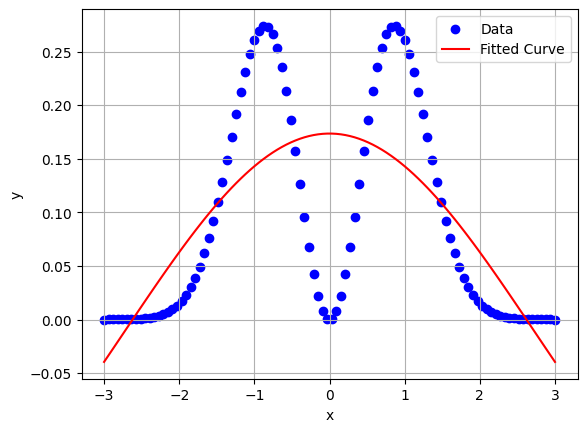

Optimized parameters: [ 0.46890483  0.06730486 -0.29543838]


In [6]:
# Define the curve function
def curve_2(x, *params):
    return params[0] * np.exp(-params[1] * x**2.) + params[2]

# Initial guess for the parameters
initial_guess = [1, 1, 1]

# Fit the curve to the data
popt, pcov = curve_fit(curve_2, x, y, p0=initial_guess)

# Plot the original data
plt.scatter(x, y, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)

In [7]:
system_prompt = ("You are a symbolic regression expert. Analyze the data and provide an improved mathematical ansatz. "
                         "Respond with ONLY the ansatz formula, without any explanation or commentary. Ensure it is in valid python. You may use numpy functions. "
                         "params is a list of parameters that can be of any length or complexity. "
                        )


prompt = ("import numpy as np \n\n"
            f"# raw data:\n"
            f"x = {x}\n"
            f"y = {y2}\n\n"
            "curve_0 = lambda x, *params: params[0]\n"
            "curve_1 = lambda x, *params: params[0]\n"
            "curve_2 = lambda x, *params:"
            )

chat = client.chat.completions.create(
                        model="openai/gpt-4o",
                        messages=[
                            {"role": "system", "content": system_prompt},
                            {
                                "role": "user",
                                "content": [
                                    {
                                        "type": "text",
                                        "text": prompt,
                                    },
                                ],
                            }
                        ],
                        max_tokens=4096,
                    )
response = chat.choices[0].message.content
print(response)

```python
curve_2 = lambda x, *params: params[0] * np.exp(-params[1] * x**2) + params[2] * np.sin(params[3] * x)
```


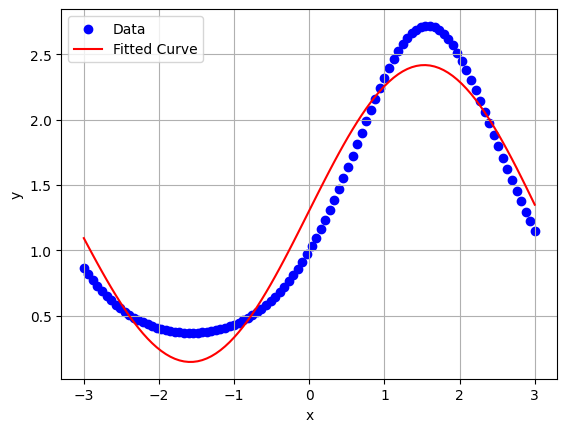

Optimized parameters: [1.30452365 0.00734157 1.13580029 1.00955945]


In [8]:
# Define the curve function
def curve_2(x, *params):
    return params[0] * np.exp(-params[1] * x**2) + params[2] * np.sin(params[3] * x)

# Initial guess for the parameters
initial_guess = [1, 1, 1, 1]

# Fit the curve to the data
popt, pcov = curve_fit(curve_2, x, y2, p0=initial_guess)

# Plot the original data
plt.scatter(x, y2, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)

In [9]:
system_prompt = ("You are a symbolic regression expert. Analyze the data and provide an improved mathematical ansatz. "
                         "Respond with ONLY the ansatz formula, without any explanation or commentary. Ensure it is in valid python. You may use numpy functions. "
                         "params is a list of parameters that can be of any length or complexity. "
                        )


prompt = ("import numpy as np \n\n"
            f"# raw data:\n"
            f"x = {x}\n"
            f"y = {y3}\n\n"
            "curve_0 = lambda x, *params: params[0]\n"
            "curve_1 = lambda x, *params: params[0]\n"
            "curve_2 = lambda x, *params:"
            )

chat = client.chat.completions.create(
                        model="openai/gpt-4o",
                        messages=[
                            {"role": "system", "content": system_prompt},
                            {
                                "role": "user",
                                "content": [
                                    {
                                        "type": "text",
                                        "text": prompt,
                                    },
                                ],
                            }
                        ],
                        max_tokens=4096,
                    )
response = chat.choices[0].message.content
print(response)

```python
curve_2 = lambda x, *params: params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]
```


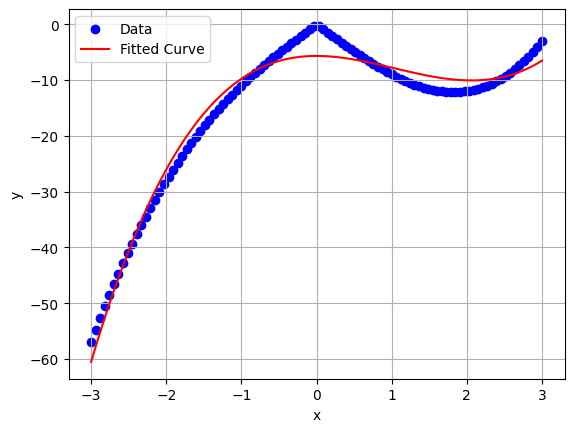

Optimized parameters: [ 1.00000001e+00 -3.09405939e+00 -3.51705620e-09 -5.68181821e+00]


In [10]:
# Define the curve function
def curve_2(x, *params):
    return params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]

# Initial guess for the parameters
initial_guess = [1, 1, 1, 1]

# Fit the curve to the data
popt, pcov = curve_fit(curve_2, x, y3, p0=initial_guess)

# Plot the original data
plt.scatter(x, y3, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)

# LLM_LEx compare

In [11]:
r = llmlex.single_call(client, base64_image, x, y, model="openai/gpt-4o",function_list=None, system_prompt=None)
print(r)

2025-04-14 11:35:23,700 - llmlex.llmlex - INFO - Extracted ansatz: params[0] * np.exp(-params[1] * x**2) * np.sin(par... with 3 parameters
2025-04-14 11:35:24,003 - llmlex.llmlex - INFO - Fit result: score=-0.0, params=[1. 1. 1.]


{'params': array([1., 1., 1.]), 'score': -0.0, 'ansatz': 'params[0] * np.exp(-params[1] * x**2) * np.sin(params[2] * x)**2', 'Num_params': 3, 'response': ChatCompletion(id='gen-1744644921-MLTCbAHEPoouBpZFnUAb', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```python\nlambda x, *params: params[0] * np.exp(-params[1] * x**2) * np.sin(params[2] * x)**2\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, reasoning=None), native_finish_reason='stop')], created=1744644921, model='openai/gpt-4o', object='chat.completion', service_tier=None, system_fingerprint='fp_b7faba9ef5', usage=CompletionUsage(completion_tokens=40, prompt_tokens=530, total_tokens=570, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None), prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)), provider='OpenAI

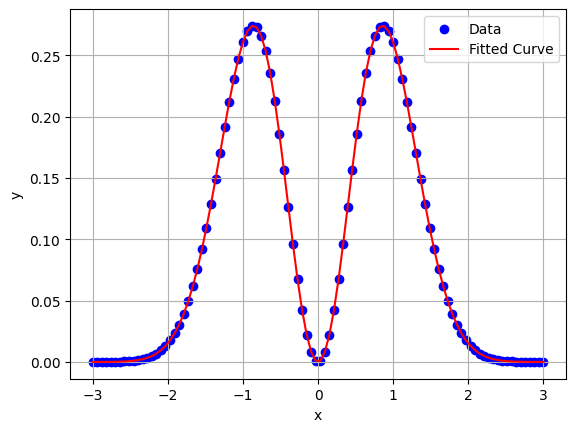

Optimized parameters: [1. 1. 1.]


In [12]:

# Define the curve function
def curve_2(x, *params):
    return params[0] * np.exp(-params[1] * x**2) * np.sin(params[2] * x)**2

# Fit the curve to the data
popt = r['params']

# Plot the original data
plt.scatter(x, y, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)

In [14]:
r = llmlex.single_call(client, base64_image, x, y2, model="openai/gpt-4o",function_list=None, system_prompt=None)
print(r)

2025-04-14 11:36:09,296 - llmlex.llmlex - INFO - Extracted ansatz: params[0] * np.exp(-params[1]*(x-params[2])**2) + ... with 6 parameters
2025-04-14 11:36:09,304 - llmlex.llmlex - INFO - Fit result: score=-0.0026761533226817846, params=[ 2.51704531  0.47287198  1.56778776  0.16736894 -0.06869949  1.75123785]


{'params': array([ 2.51704531,  0.47287198,  1.56778776,  0.16736894, -0.06869949,
        1.75123785]), 'score': -0.0026761533226817846, 'ansatz': 'params[0] * np.exp(-params[1]*(x-params[2])**2) + params[3] * np.exp(-params[4]*(x-params[5])**2)', 'Num_params': 6, 'response': ChatCompletion(id='gen-1744644961-E4jWEy2ET9yh2rXT1FRx', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```python\ncurve_1 = lambda x, *params: params[0] * np.exp(-params[1]*(x-params[2])**2) + params[3] * np.exp(-params[4]*(x-params[5])**2)\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, reasoning=None), native_finish_reason='stop')], created=1744644961, model='openai/gpt-4o', object='chat.completion', service_tier=None, system_fingerprint='fp_85bc8e3fae', usage=CompletionUsage(completion_tokens=58, prompt_tokens=530, total_tokens=588, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=None, au

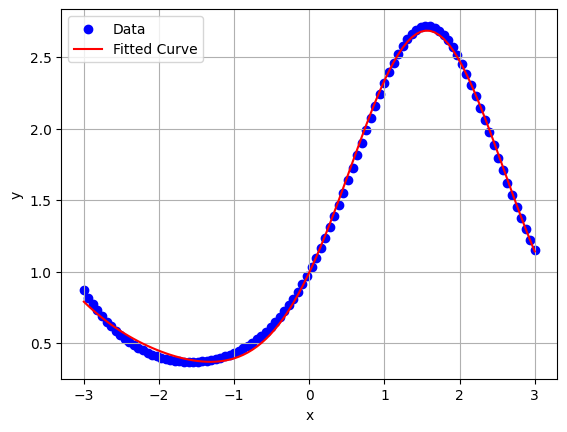

Optimized parameters: [ 2.51704531  0.47287198  1.56778776  0.16736894 -0.06869949  1.75123785]


In [15]:
# Define the curve function
def curve_2(x, *params):
    return params[0] * np.exp(-params[1]*(x-params[2])**2) + params[3] * np.exp(-params[4]*(x-params[5])**2)

# Fit the curve to the data
popt = r['params']

# Plot the original data
plt.scatter(x, y2, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)

In [16]:
r = llmlex.single_call(client, base64_image, x, y3, model="openai/gpt-4o",function_list=None, system_prompt=None)
print(r)

2025-04-14 11:36:40,016 - llmlex.llmlex - INFO - Extracted ansatz: params[0] * np.exp(-params[1] * (x - params[2])**2... with 6 parameters
2025-04-14 11:36:40,170 - llmlex.llmlex - INFO - Fit result: score=-0.5350680947303772, params=[-3.39925887 -0.12440648  1.22428815 -3.39926837 -0.12438504  1.22434841]


{'params': array([-3.39925887, -0.12440648,  1.22428815, -3.39926837, -0.12438504,
        1.22434841]), 'score': -0.5350680947303772, 'ansatz': 'params[0] * np.exp(-params[1] * (x - params[2])**2) + params[3] * np.exp(-params[4] * (x - params[5])**2)', 'Num_params': 6, 'response': ChatCompletion(id='gen-1744644995-G8WcDQkyc5vJFS7TBiah', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```python\ncurve_1 = lambda x, *params: params[0] * np.exp(-params[1] * (x - params[2])**2) + params[3] * np.exp(-params[4] * (x - params[5])**2)\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, reasoning=None), native_finish_reason='stop')], created=1744644995, model='openai/gpt-4o', object='chat.completion', service_tier=None, system_fingerprint='fp_b7faba9ef5', usage=CompletionUsage(completion_tokens=62, prompt_tokens=530, total_tokens=592, completion_tokens_details=CompletionTokensDetails(accepted_prediction_to

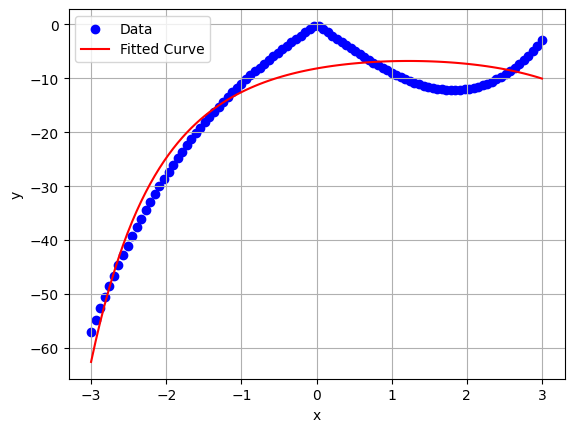

Optimized parameters: [-3.39925887 -0.12440648  1.22428815 -3.39926837 -0.12438504  1.22434841]


In [17]:
# Define the curve function
def curve_2(x, *params):
    return params[0] * np.exp(-params[1] * (x - params[2])**2) + params[3] * np.exp(-params[4] * (x - params[5])**2)

# Fit the curve to the data
popt = r['params']

# Plot the original data
plt.scatter(x, y3, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)